<IPython.core.display.Javascript object>


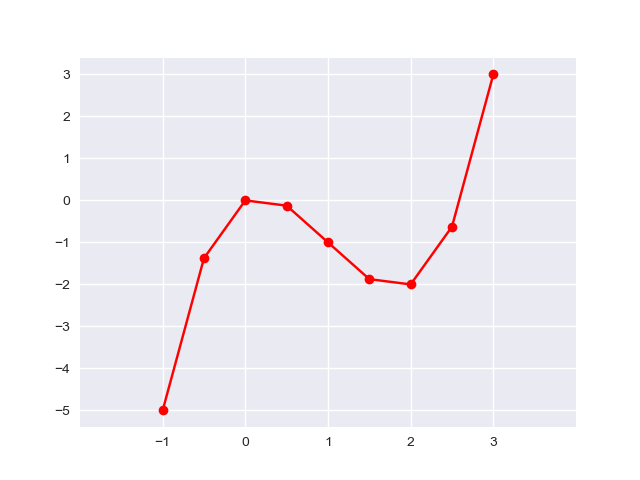

In [11]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 9)
y = f(x)

plt.plot(x, y, 'ro-')
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.show()

# 로그 함수의 성질 1: 로그 함수는 곱하기를 더하기로 변환한다.
# 로그 함수의 성질 2: 어떤 함수에 로그를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않는다.
# 로그 함수의 성질 3: 로그 함수는 0부터 1사이의 작은 값을 확대시켜 보여준다.
$$ \arg\max_x f(x) = \arg\max_x \log f(x) $$

 # 다변수 함수
 2개의 독립 변수를 가지는 함수  f(x,y)f(x,y) 는 다음처럼 3차원 서피스 플롯(surface plot), 또는 컨투어 플롯(contour plot)으로 나타낼 수 있다.

<IPython.core.display.Javascript object>


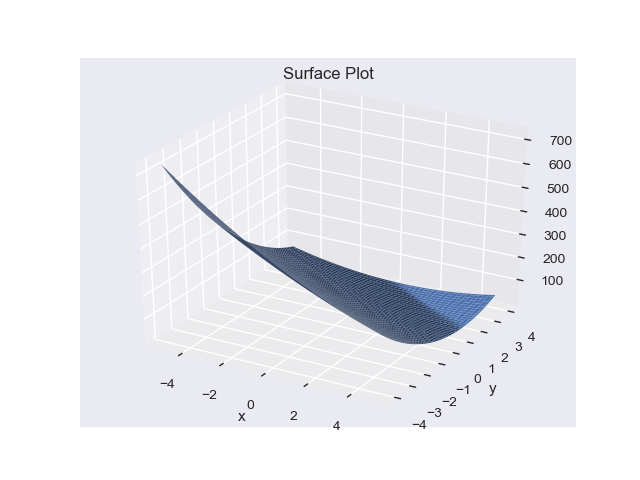

In [12]:
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(xx, yy)
Z = f(X, Y)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.gca(projection='3d').plot_surface(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Surface Plot")
plt.show()

# 미분 공식

- 상수

> $ \dfrac{d}{dx}(c) = 0 $

- 거듭제곱

> $ \dfrac{d}{dx}(x^n) = n x^{n-1}$

- 로그

> $ \dfrac{d}{dx}(\log x) = \dfrac{1}{x}$

- 지수 

> $ \dfrac{d}{dx}(e^x) = e^x $

# SymPy

In [14]:
import sympy

In [16]:
x = sympy.symbols('x')
type(x)

sympy.core.symbol.Symbol

In [17]:
f = x * sympy.exp(x)
f

x*exp(x)

In [18]:
sympy.diff(f) ##### 미분

x*exp(x) + exp(x)

In [19]:
sympy.simplify(sympy.diff(f))


(x + 1)*exp(x)

In [20]:
x, y = sympy.symbols('x y')
f = x ** 2 + x * y + y ** 2
sympy.diff(f, x) #### 편미분

2*x + y

In [22]:
x = sympy.symbols('x')
f = x * sympy.exp(x) + sympy.exp(x)
sympy.integrate(f) # 적분
sympy.integrate(f, x)

x*exp(x)

In [24]:
x, y = sympy.symbols('x y')
f = x ** 3 - 3 * x ** 2 + x + 6
F = sympy.integrate(f)
(F.subs(x, 2) - F.subs(x, 0)).evalf()  ##부정적분

10.0000000000000

In [27]:
import scipy as sp
def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6

sp.integrate.quad(f, 0, 2)           ## 정적분 (수치적분)

(10.0, 1.1102230246251565e-13)

 $$ \int_0^{\infty} \int_1^{\infty} \dfrac{\exp(-xy)}{y^2} dx dy $$

In [29]:
def f(x, y):
    return np.exp(-x * y) / y**2


sp.integrate.dblquad(f, 1, np.inf, lambda x: 0, lambda x: np.inf)    #   dblquad(func, a, b, gfun, hfun)

(0.4999999999999961, 1.068453874338024e-08)

# 행렬의 미분
- 스칼라를 벡터로 미분

그레디언트 벡터(gradient vector)  ∇y

$$ \nabla y = 
\frac{\partial y}{\partial \mathbf{x}} =
\begin{bmatrix}
\dfrac{\partial y}{\partial x_1}\\
\dfrac{\partial y}{\partial x_2}\\
\vdots\\
\dfrac{\partial y}{\partial x_N}\\
\end{bmatrix} $$

 $$ \frac{\partial \mathbf{w}^{T}\mathbf{x}}{\partial \mathbf{x}} = \frac{\partial \mathbf{x}^{T}\mathbf{w}}{\partial \mathbf{x}} = \mathbf{w} $$

$$ \frac{\partial \mathbf{x}^{T}\mathbf{A}\mathbf{x}}{\partial \mathbf{x}} = (\mathbf{A} + \mathbf{A}^{T})\mathbf{x} $$

- 벡터를 스칼라로 미분
$$ \frac{\partial \mathbf{y}}{\partial x} = \left[
\frac{\partial y_1}{\partial x}
\frac{\partial y_2}{\partial x}
\cdots
\frac{\partial y_M}{\partial x}
\right] $$


- 벡터를 벡터로 미분하는 경우
자코비안 행렬(Jacobian matrix)
$$ \mathbf J = \frac{d\mathbf y}{d\mathbf x} = 
\begin{bmatrix}
\dfrac{\partial y_1}{\partial \mathbf x}^T \\ \vdots \\ \dfrac{\partial y_M}{\partial \mathbf x}^T 
\end{bmatrix} =
\begin{bmatrix}
\nabla y_1^T \\ \nabla y_2^T \\ \vdots \\ \nabla y_M^T \\ 
\end{bmatrix} =
\begin{bmatrix}
\dfrac{\partial y_1}{\partial x_1} & \cdots & \dfrac{\partial y_1}{\partial x_N}\\
\vdots & \ddots & \vdots\\
\dfrac{\partial y_M}{\partial x_1} & \cdots & \dfrac{\partial y_M}{\partial x_N} 
\end{bmatrix} $$

# 스칼라를 행렬로 미분

$$ \frac{\partial y}{\partial \mathbf{X}} =
\begin{bmatrix}
\frac{\partial y}{\partial x_{1,1}} & \frac{\partial y}{\partial x_{1,2}} & \cdots & \frac{\partial y}{\partial x_{1,N}}\\
\frac{\partial y}{\partial x_{2,1}} & \frac{\partial y}{\partial x_{2,2}} & \cdots & \frac{\partial y}{\partial x_{2,N}}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial y}{\partial x_{M,1}} & \frac{\partial y}{\partial x_{M,2}} & \cdots & \frac{\partial y}{\partial x_{M,N}}\\
\end{bmatrix} $$

행렬 곱의 대각성분 미분
$$ \dfrac{\partial \text{tr} (\mathbf{B}\mathbf{A})}{\partial \mathbf{A}} = \mathbf{B}^T $$
행렬식의 로그
$$\dfrac{\partial \log \det \mathbf{A} }{\partial \mathbf{A}} = (\mathbf{A}^{-1})^T$$